# **Portada Dinosaurios**
## Algoritmo K-Means Clustering
K-means es un algoritmo de agrupamiento. Con k-means hay que especificar la cantidad de grupos que quiero generar con anticipación. Hay algoritmos que seleccionan automáticamente el valor óptimo de k.

El objetivo es dividir x puntos de datos en n grupos. Cada uno de los puntos de datos se asignará a un grupo con la media más cercana, la cual se llamará "centroide".

En este ejercicio, voy a ver las intensidades de píxeles en las 3 capas RGB en mi imagen de dinosaurios.

Los píxeles que pertenezcan a un grupo concreto serán más similares en color que los píxeles que pertenezcen a otro grupo.

### Importo librerias

In [1]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


### Defino centroides/ clusters que quiero obtener con el algoritmo K-means

In [2]:
# Defino 5 clusters
clusters = 5

### Importo imagen

In [3]:
# imread : función para leer datos en archivos de imágenes
mi_portada = cv2.imread ('portada_eda.jpg') 

#cv2.imshow('Mi portada', mi_portada)

In [4]:
# Quiero ver mis matrices de las 3 capas de color
nportada = np.array (mi_portada, dtype = np.float32) /255.0 #Convertir a np
(b,g,r) = cv2.split(nportada)
print(b,g,r)


[[0.9098039  0.9411765  0.9764706  ... 0.9607843  0.95686275 0.9529412 ]
 [0.9882353  1.         1.         ... 0.9529412  0.9529412  0.9529412 ]
 [0.93333334 0.9764706  0.9882353  ... 0.96862745 0.9647059  0.9607843 ]
 ...
 [0.21176471 0.38039216 0.43137255 ... 0.07450981 0.07450981 0.13725491]
 [0.21176471 0.2901961  0.36862746 ... 0.01960784 0.06666667 0.13333334]
 [0.19215687 0.20392157 0.27450982 ... 0.05098039 0.09411765 0.13333334]] [[0.92941177 0.9607843  0.972549   ... 0.9764706  0.972549   0.96862745]
 [1.         1.         1.         ... 0.96862745 0.96862745 0.96862745]
 [0.9411765  0.9843137  0.99215686 ... 0.98039216 0.9764706  0.972549  ]
 ...
 [0.29803923 0.46666667 0.50980395 ... 0.05490196 0.05490196 0.11764706]
 [0.29803923 0.3764706  0.44705883 ... 0.         0.04705882 0.11372549]
 [0.2784314  0.2901961  0.3529412  ... 0.03137255 0.07450981 0.11372549]] [[0.87058824 0.9019608  0.93333334 ... 0.68235296 0.6784314  0.6745098 ]
 [0.9372549  0.9529412  0.95686275 ... 

In [5]:
# SUPER IMPORTANTE PARA ORDENAR LAS 3 CAPAS RED, GREEN & BLUE
image = cv2.cvtColor(mi_portada, cv2.COLOR_BGR2RGB)


### Aqui está la portada de los dinosaurios

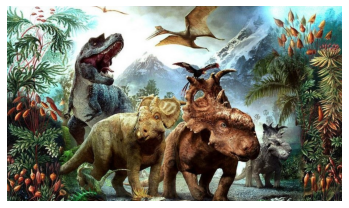

In [6]:
# Muestro la imagen
plt.figure()
plt.axis("off")
plt.imshow(image);

### Reshape de la imagen para obtener lista de pixeles

In [7]:
# Tengo 3 matrices R, G y B: aplanar las columnas de pixeles
image = image.reshape((image.shape[0] * image.shape[1], 3)) 

### Modelo K-Means con los clusters definidos

In [8]:
clt = KMeans(n_clusters = clusters)
clt.fit(image)

KMeans(n_clusters=5)

In [9]:
clusters = clt.cluster_centers_

### Estos son mis 5 clusters

In [10]:

centroides = pd.DataFrame(clusters, columns=['Red', 'Green', 'Blue'])
centroides

,Red,Green,Blue
0,129.901529,129.125105,108.042146
1,34.024636,27.407871,16.825542
2,163.906245,185.849199,176.268776
3,82.302647,76.605286,56.859888
4,228.268833,244.911668,239.939795


### Qué peso tiene cada uno de los clusters

In [11]:
def histograma_centroides(clt):
    '''
    Función que en base a los k definidos, crea un histograma según la cantidad de pixeles de cada cluster
    '''
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalizo histograma para que sume 1
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist

In [12]:
def plot_colors(hist, centroids):
    '''
    Función para preparar el gráfico de barras que mostrará la frecuencia relativa de cada color centroide
    '''
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # bucle para iterar sobre el porcentaje y color de cada cluster
    for (percent, color) in zip(hist, centroids):
        # porcentaje de cada cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    
    return bar

In [13]:
hist = histograma_centroides(clt)
hist

array([0.19929327, 0.27584792, 0.14847572, 0.23397125, 0.14241184])

In [14]:
pesos = pd.DataFrame(hist*100, columns=['Peso del color sobre total imagen'])

### Tabla con clusters y su peso

In [15]:
concat = pd.concat([centroides, pesos], axis=1) 
nombres_clusters= ['Cluster1', 'Cluster2','Cluster3', 'Cluster4', 'Cluster5']
concat.index = list(nombres_clusters)
concat

,Red,Green,Blue,Peso del color sobre total imagen
Cluster1,129.901529,129.125105,108.042146,19.929327
Cluster2,34.024636,27.407871,16.825542,27.584792
Cluster3,163.906245,185.849199,176.268776,14.847572
Cluster4,82.302647,76.605286,56.859888,23.397125
Cluster5,228.268833,244.911668,239.939795,14.241184


### Visualizo los colores centroides y su peso que ha extraido el algoritmo

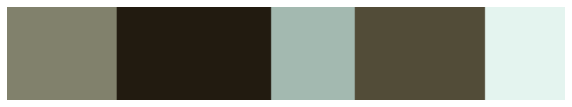

In [16]:
# Gráfico de barra con los colores centroides

bar = plot_colors(hist, clt.cluster_centers_)

plt.figure(figsize=(10, 8))
plt.axis("off")
plt.imshow(bar)
plt.xticks()
plt.show()

# Estos 5 son mis colores dominantes de la portada de dinosaurios